In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
knn_model = KNeighborsClassifier().fit(X_train_scaled, y_train)

In [4]:
knn_model

KNeighborsClassifier()

In [5]:
y_pred = knn_model.predict(X_test_scaled)

In [6]:
accuracy_score(y_test, y_pred)

0.9438314944834504

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       828
           1       0.95      0.56      0.70        68
           2       0.97      0.75      0.85        52
           3       0.00      0.00      0.00         1
           4       0.97      0.80      0.88        45
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.94       997
   macro avg       0.55      0.44      0.49       997
weighted avg       0.94      0.94      0.94       997



C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### tuning

In [8]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [9]:
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train_scaled, y_train)

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [10]:
knn_cv_model.best_score_

0.949241527305017

In [11]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [12]:
knn_tuned = KNeighborsClassifier(n_neighbors= 1).fit(X_train_scaled, y_train)

In [13]:
y_pred = knn_tuned.predict(X_test_scaled)

In [14]:
accuracy_score(y_test, y_pred)

0.9538615847542627

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       828
           1       0.90      0.63      0.74        68
           2       1.00      0.83      0.91        52
           3       0.00      0.00      0.00         1
           4       0.97      0.87      0.92        45
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1

    accuracy                           0.95       997
   macro avg       0.62      0.62      0.60       997
weighted avg       0.95      0.95      0.95       997



C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
confusion_matrix(y_test, y_pred)


array([[825,   3,   0,   0,   0,   0,   0],
       [ 24,  43,   0,   0,   0,   1,   0],
       [  8,   0,  43,   0,   0,   0,   1],
       [  0,   1,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,  39,   0,   0],
       [  0,   1,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1]], dtype=int64)

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       828
           1       0.90      0.63      0.74        68
           2       1.00      0.83      0.91        52
           3       0.00      0.00      0.00         1
           4       0.97      0.87      0.92        45
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1

    accuracy                           0.95       997
   macro avg       0.62      0.62      0.60       997
weighted avg       0.95      0.95      0.95       997



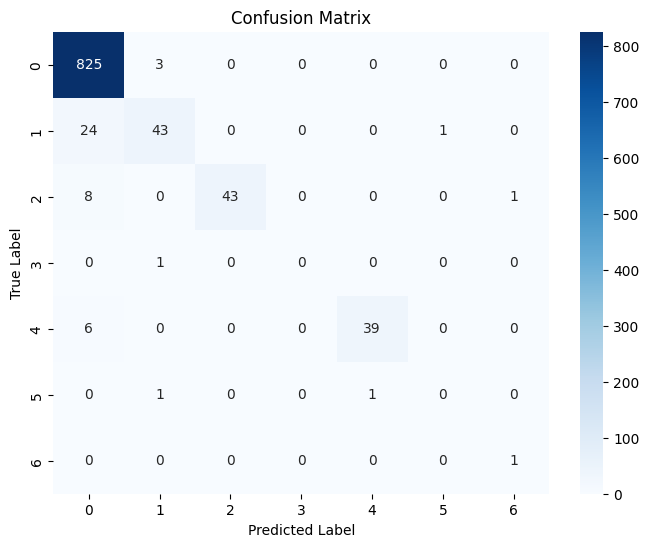

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = knn_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

labels = sorted(y_test.unique()) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()